# Exploratory Data Analysis (EDA) - Student Social Media Addiction Dataset

This notebook explores how social media usage affects students across different countries, platforms, and academic performance metrics. The analysis focuses on patterns in addiction, mental health, and academic impact.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
#pio.renderers.default = "notebook"
pio.renderers.default = 'jupyterlab'


In [2]:
students = pd.read_csv("Students Social Media Addiction.csv")
students.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [3]:
students.info()
students.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [8]:
country_counts = students['Country'].value_counts()
threshold = 10

students['Country_Grouped'] = students['Country'].apply(
    lambda x: x if country_counts[x] >= threshold else 'Other'
)


## Univariate Analysis

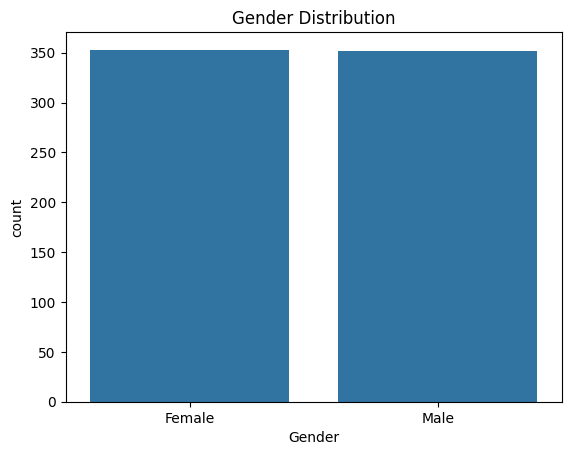

In [ ]:
sns.countplot(data=students, x='Gender')
plt.title('Gender Distribution')
plt.show()


## Boxplots of Numerical Features vs Addicted Score

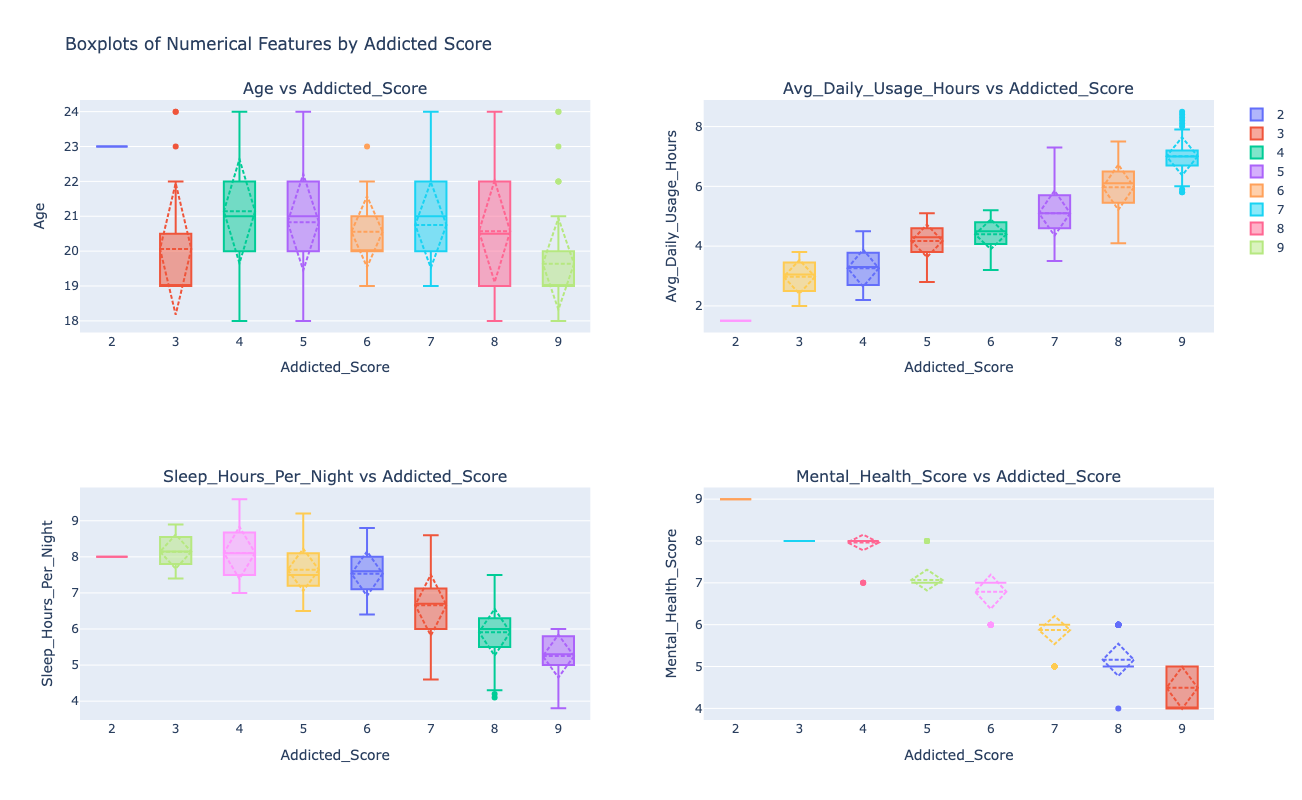

In [23]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
fig.update_xaxes(categoryorder='array', categoryarray=sorted(students[target].unique()))

numerical_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score']
target = 'Addicted_Score'

num_plots = len(numerical_features)
cols = 2
rows = math.ceil(num_plots / cols)

fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=[f'{feature} vs {target}' for feature in numerical_features]
)

for idx, feature in enumerate(numerical_features):
    row = idx // cols + 1
    col = idx % cols + 1

    for val in sorted(students[target].unique()):  # Sort target values
        fig.add_trace(
            go.Box(
                y=students[students[target] == val][feature],
                name=str(val),
                boxmean='sd',
                showlegend=(idx == 0)
            ),
            row=row,
            col=col
        )

    # Add axis labels for this subplot
    fig.update_yaxes(title_text=feature, row=row, col=col)
    fig.update_xaxes(
        title_text=target,
        row=row,
        col=col,
        categoryorder='array',
        categoryarray=sorted(students[target].unique())
    )

fig.update_layout(
    height=rows * 400,
    width=cols * 600,
    title_text="Boxplots of Numerical Features by Addicted Score",
    showlegend=True
)

fig.show()



## 📊 Boxplots of Numerical Features by Addicted Score

The visual below presents **boxplots** of selected numerical features plotted against the target variable: `Addicted_Score`.


### 🔍 Feature-wise Observations

- **Age vs Addicted Score**  
  Age does not show a clear increasing or decreasing trend with addiction scores. The spread is fairly uniform, with some minor variations and outliers across the range.

- **Average Daily Usage Hours vs Addicted Score**  
  A clear positive trend is evident — students with higher addiction scores tend to have significantly higher average daily usage hours. This could suggest a strong behavioral link between screen time and addiction.

- **Sleep Hours Per Night vs Addicted Score**  
  There appears to be a mild inverse relationship. Higher `Addicted_Score` groups tend to have lower median sleep hours, though variability exists. This may indicate that addiction affects or coincides with poor sleep habits.

- **Mental Health Score vs Addicted Score**  
  Mental health scores tend to decline as addiction scores increase. The median mental health score is lower in higher addiction groups, suggesting a potential negative impact of addiction on mental well-being.

### 📌 Notes

- Each subplot shows the distribution of a numerical feature for each unique `Addicted_Score` level.
- Boxes represent the interquartile range (IQR), with medians and outliers clearly visible.
- Distinct colors are used for each group to aid visual separation.




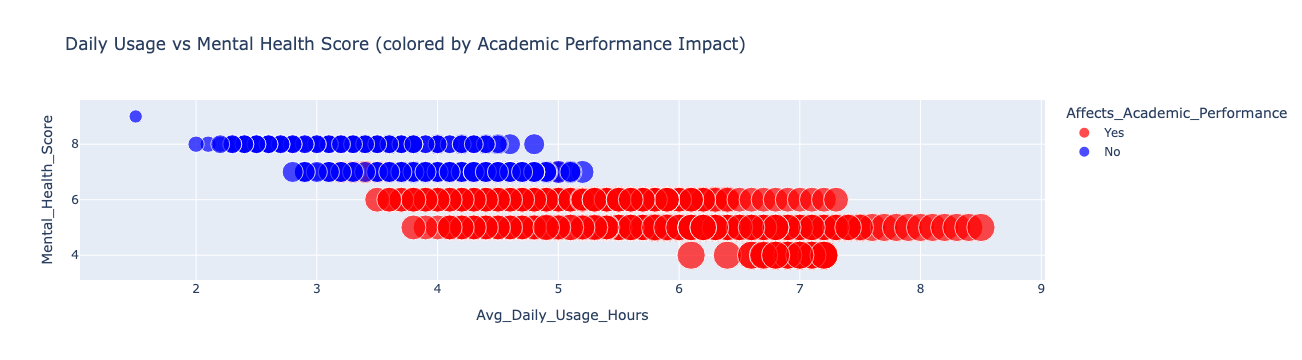

In [25]:
fig2 = px.scatter(
    students,
    x='Avg_Daily_Usage_Hours',
    y='Mental_Health_Score',
    color='Affects_Academic_Performance',
    color_discrete_map={
        'Yes': 'red',
        'No': 'blue'  # You can choose any other color you prefer
    },
    size='Addicted_Score',
    hover_data=['Country_Grouped', 'Gender'],
    title='Daily Usage vs Mental Health Score (colored by Academic Performance Impact)'
)
fig2.show()


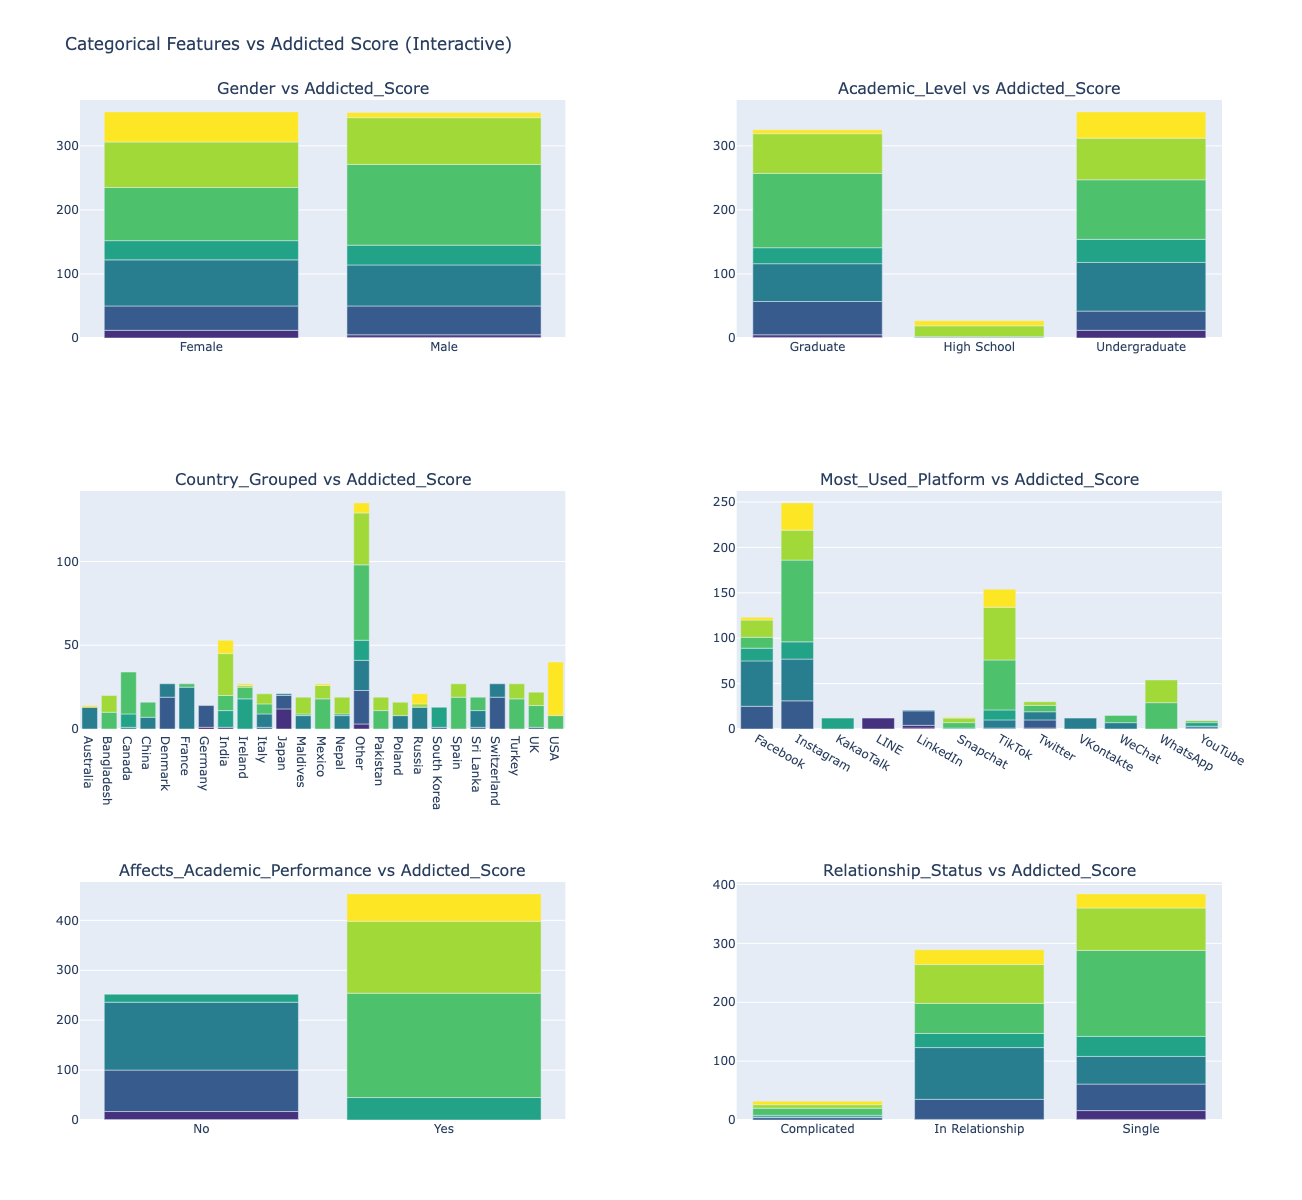

In [28]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

categorical_features = ['Gender', 'Academic_Level', 'Country_Grouped', 'Most_Used_Platform',
                        'Affects_Academic_Performance', 'Relationship_Status']
target = 'Addicted_Score'

num_plots = len(categorical_features)
cols = 2
rows = math.ceil(num_plots / cols)

# Create subplot grid
fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=[f'{feature} vs {target}' for feature in categorical_features],
    horizontal_spacing=0.15,
    vertical_spacing=0.15
)

for idx, feature in enumerate(categorical_features):
    row = idx // cols + 1
    col = idx % cols + 1

    # Count plot equivalent using Plotly
    count_df = students.groupby([feature, target]).size().reset_index(name='Count')

    fig.add_trace(
        go.Bar(
            x=count_df[feature],
            y=count_df['Count'],
            name=feature,
            marker=dict(color=count_df[target], colorscale='Viridis'),
            customdata=count_df[[target]],
            hovertemplate=f"{feature}: %{{x}}<br>{target}: %{{customdata[0]}}<br>Count: %{{y}}<extra></extra>"
        ),
        row=row,
        col=col
    )

# Final layout settings
fig.update_layout(
    height=rows * 400,
    width=1000,
    title_text='Categorical Features vs Addicted Score (Interactive)',
    barmode='group',
    showlegend=False
)

fig.show()



## Heatmap of High Addiction % by Country and Platform

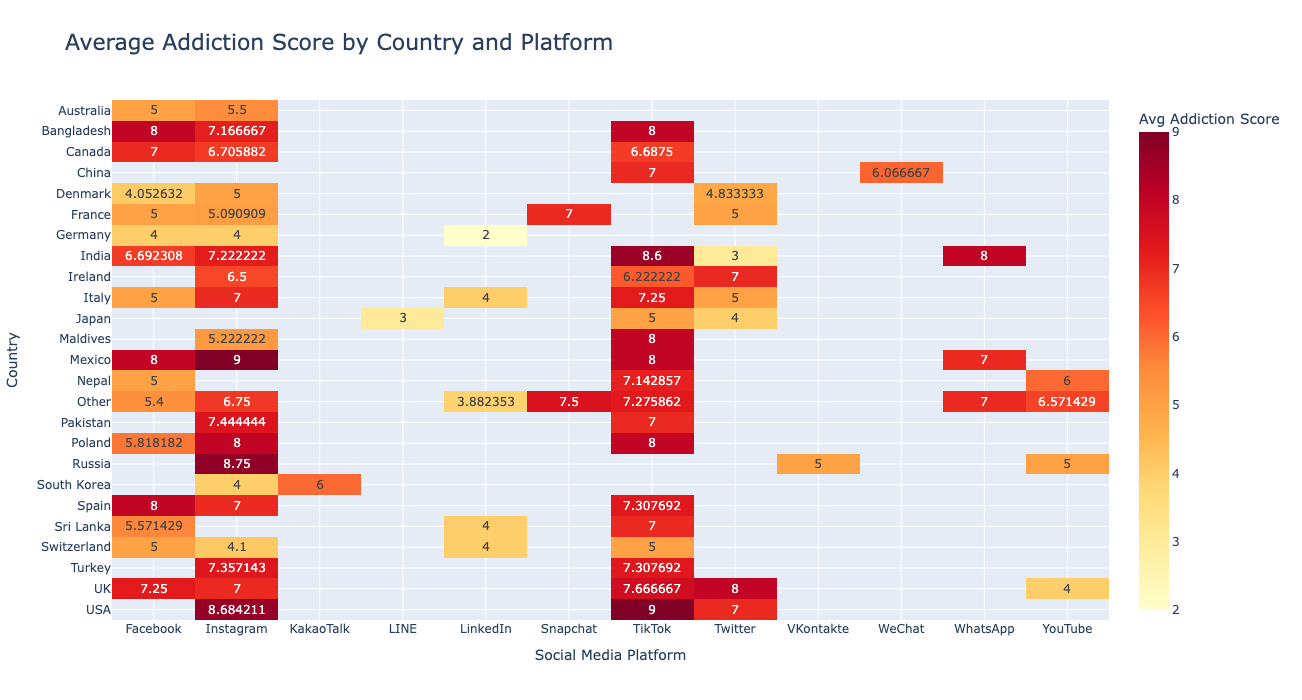

In [11]:


fig3 = px.imshow(
    pivot,
    text_auto=True,
    aspect="auto",
    title='Average Addiction Score by Country and Platform',
    color_continuous_scale='YlOrRd',  # Better color scale
    labels=dict(x="Social Media Platform", y="Country", color="Avg Addiction Score")
)

# Increase size
fig3.update_layout(
    height=700,
    width=1000,
    title_font_size=22
)

fig3.show()


In [12]:
# Filter for high addiction scores
high_addiction_df = grouped[grouped['Addicted_Score'] > 7].sort_values(by='Addicted_Score', ascending=False)

# Display the subset
print(high_addiction_df)


   Country_Grouped Most_Used_Platform  Addicted_Score
80             USA             TikTok        9.000000
39          Mexico          Instagram        9.000000
57          Russia          Instagram        8.750000
79             USA          Instagram        8.684211
22           India             TikTok        8.600000
40          Mexico             TikTok        8.000000
77              UK            Twitter        8.000000
62           Spain           Facebook        8.000000
56          Poland             TikTok        8.000000
55          Poland          Instagram        8.000000
2       Bangladesh           Facebook        8.000000
38          Mexico           Facebook        8.000000
37        Maldives             TikTok        8.000000
24           India           WhatsApp        8.000000
4       Bangladesh             TikTok        8.000000
76              UK             TikTok        7.666667
48           Other           Snapchat        7.500000
52        Pakistan          

# 🔍 Key Observations from the Heatmap (Filtered for High Addiction: Score > 7)

## 🟥 High Addiction Hotspots
- **USA** shows very high addiction to:
  - **TikTok**: `9.00`
  - **Instagram**: `8.68`
&nbsp;
- **Mexico** stands out with:
  - **Instagram**: `9.00`
  - **TikTok**: `8.00`
  - **Facebook**: `8.00`
&nbsp;
- **Russia** also reports high addiction to:
  - **Instagram**: `8.75`

## 📱 Top Addictive Platforms
- **TikTok** appears in **11 out of 26** high-addiction rows, making it the **most frequently high-scoring platform**. High addiction seen in:
  - India: `8.60`
  - Mexico: `8.00`
  - Maldives: `8.00`
  - Bangladesh: `8.00`
  - Poland: `8.00`
  - Spain: `7.31`
  - Turkey: `7.31`
  - Nepal: `7.14`
  - UK: `7.67`
  - Italy: `7.25`
  - Other: `7.28`
&nbsp;
- **Instagram** appears in **9 rows**, showing widespread addiction:
  - Russia: `8.75`
  - USA: `8.68`
  - Bangladesh: `7.17`
  - India: `7.22`
  - Turkey: `7.36`
  - Pakistan: `7.44`
  - Poland: `8.00`
  - Mexico: `9.00`
  - Other: not listed, but high in grouped regions
&nbsp;
- **Facebook** shows high addiction in:
  - Spain: `8.00`
  - Mexico: `8.00`
  - UK: `7.25`
  - Bangladesh: `8.00`

## 🌍 “Other” Countries
Even in the **"Other" grouped countries** (countries with low individual sample size), some platforms report high addiction:
- **TikTok**: `7.28`
- **Snapchat**: `7.50`

This implies these platforms have a **consistently high addictive effect globally**, not just in dominant countries.

## 📉 Low Addiction Platforms
Platforms like:
- **LINE**
- **KakaoTalk**
- **VKontakte**
- **WeChat**
- **LinkedIn**

do **not appear** in this high-addiction subset — indicating **low engagement or limited geographic use**, and thus **lower addictive tendencies** in the sample.

---

📌 *Conclusion*: **TikTok**, **Instagram**, and to some extent **Facebook** stand out as **globally addictive platforms**, with scores exceeding `8` in multiple countries.
